### Wave equation

In [1]:
import functools as ft
import multiprocessing as mp
import logging

import numpy as np
from scipy.signal import gaussian

import pylab as pl

from triflow import Model, Simulation, schemes, displays

%matplotlib inline

We initialize the model with the wave equation written as a system of first order differential equations.

$$\partial_{t,\,t}u = c^2 \partial_{x,\,x} u$$

which lead to 

\begin{align}
    \partial_{t}u &= v\\
    \partial_{t}v &= c^2 \partial_{x,\,x} u
\end{align}

with $c$ the velocity of the wave.

In [2]:
model = Model(["c**2 * dxxu", "v"],
               ["v", "u"], "c")

We discretize our spatial domain. `retstep=True` ask to return the spatial step.

In [3]:
x, dx = np.linspace(0, 100, 500, retstep=True)

We initialize with three gaussian pulses for the initial condition

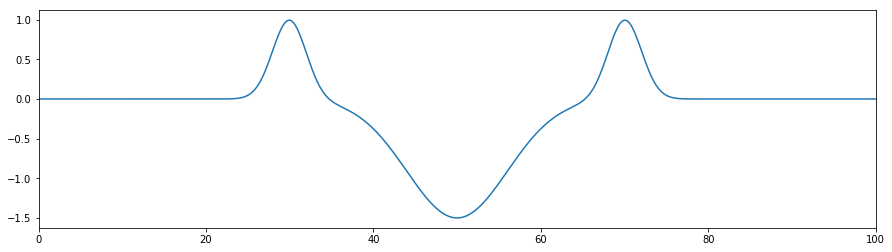

In [9]:
u = (np.roll(gaussian(x.size, 10), x.size // 5) +
     np.roll(gaussian(x.size, 10), -x.size // 5) -
     gaussian(x.size, 30) * 1.5)
v = np.zeros_like(u)

fields = model.fields_template(x=x, u=u, v=v)

pl.figure(figsize=(15, 4))
pl.plot(fields.x, fields.u)
pl.xlim(0, fields.x.max())
pl.show()

We precise our parameters. The default scheme provide an automatic time_stepping. We want dirichlet boundary condition, so we set the periodic flag to False.

In [10]:
parameters = dict(c=5, periodic=False)

This function will set the boundary condition. We will have a fixed rope at each edge.

In [11]:
def dirichlet(t, fields, pars):
    # fields.u[:] = np.sin(t * 2 * np.pi * 2) * gaussian(x.size, 10) - fields.u[:]
    fields.u[0] = 0
    fields.u[-1] = 0
    fields.v[0] = 0
    fields.v[-1] = 0
    return fields, pars

We initialize the simulation, and we set a bokeh display in order to have real-time plotting.

In [12]:
t = 0
simulation = Simulation(model, t, fields, parameters,
                        dt=.1, tmax=15,
                        hook=dirichlet)

We iterate on the simulation until the end.

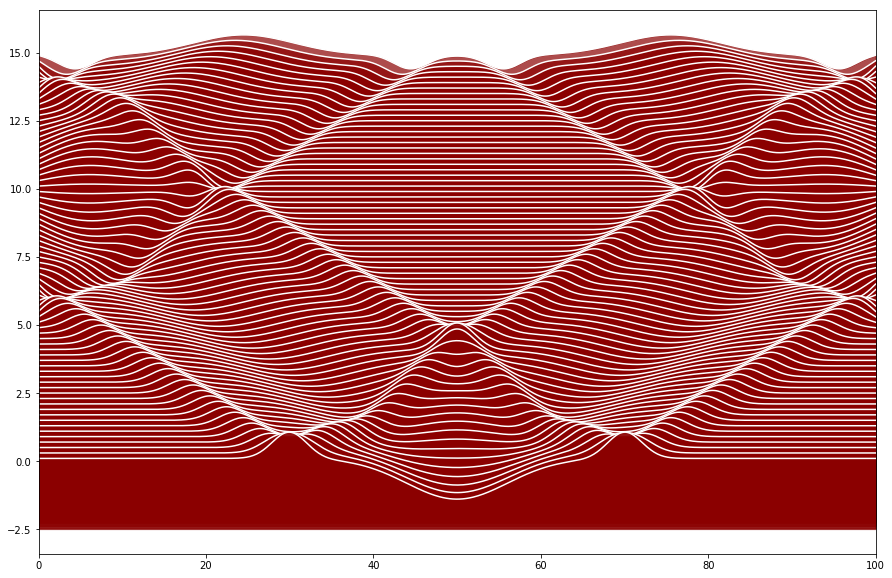

In [13]:
pl.figure(figsize=(15, 10))
for i, (t, fields) in enumerate(simulation):
    if i % 2 == 0:
        pl.fill_between(fields.x, fields.u + .1 * (i + 1),
                        fields.u.min() - 1,
                        color='darkred', zorder=-2 * i, alpha=.7)
        pl.plot(fields.x, fields.u + .1 * (i + 1), 
                color='white',
                zorder=-(2 * i - 1))
    print(f"t: {t:g}".ljust(80), end='\r')
pl.xlim(0, fields.x.max())
pl.show()